# Classifying patients into "Breast Cancer recurrence/no-recurrence events"

In [1]:
# Import all required libraries
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score , precision_score , precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  BaggingClassifier , AdaBoostClassifier ,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
%matplotlib inline

In [3]:
# Import the dataset
data = pd.read_csv('breast-cancer_csv.csv')
# Print head of the  dataframe
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [14]:
# created data preprocessing template
def preprocessing(df):
    # filling missing data
    df = df.fillna(method='ffill')
    # taking mean of ranges
    Age = pd.Series([np.mean(np.array(range(int(i.split('-')[0]),int(i.split('-')[1])+1))) for i in df['age']])
    Tumor_size =  pd.Series([np.mean(np.array(range(int(i.split('-')[0]),int(i.split('-')[1])+1))) for i in df['tumor-size']])
    Inv_nodes = pd.Series([np.mean(np.array(range(int(i.split('-')[0]),int(i.split('-')[1])+1))) for i in df['inv-nodes']])
    #creating a dummy varibles
    nc = pd.get_dummies(df['node-caps'] ,  drop_first= True)
    bre = pd.get_dummies(df['breast'],drop_first=True)
    irr = pd.get_dummies(df['irradiat'], drop_first=True)
    cls = pd.get_dummies(df['Class'] , drop_first=True)
    # Dropping unnecessary and concatinating new columns into old data
    df=df.drop(['age','menopause' , 'tumor-size' ,'inv-nodes','node-caps','breast','breast-quad','irradiat','Class'] ,axis = 1)
    df =pd.concat([Age,Tumor_size , Inv_nodes,nc,data['deg-malig'],bre, irr, cls] , axis  = 1)
    # Rename columns
    df.columns = ['Age', 'Tumor-Size', 'inv-nodes', 'Node-cap(yes)','deg-malig', 'breast(right)', 'Irradiate', 'Class']
    return (df)
# Passing the data through the function
df = preprocessing(data)
# create a Evaluation Dataframe
Eval_table = pd.DataFrame({'Model': [],
                          'Accuracy':[],
                           'Precision':[]})

In [5]:
# Print preprocessed dataframe
df.head()

,Age,Tumor-Size,inv-nodes,Node-cap(yes),deg-malig,breast(right),Irradiate,Class
0,44.5,17.0,1.0,1,3,1,0,1
1,54.5,17.0,1.0,0,1,1,0,0
2,54.5,37.0,1.0,0,2,0,0,1
3,44.5,37.0,1.0,1,3,1,1,0
4,44.5,32.0,4.0,1,2,0,0,1


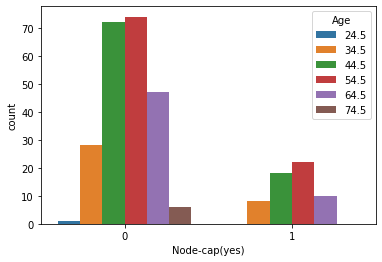

In [8]:
# Data analysis
# The lymph node capsule(ovoid shaped , around 450 in adults)
#when metastasise to a lymph node,lymph nodes may get replaced by the tumor and then penetrate the capsule,allowing it to invade the surrounding tissues cancer become aggressive ,lymph nodes may get replaced by the tumor and then penetrate the capsule,allowing it to invade the surrounding tissues 
sns.countplot(x = 'Node-cap(yes)' , hue= 'Age' , data = df)


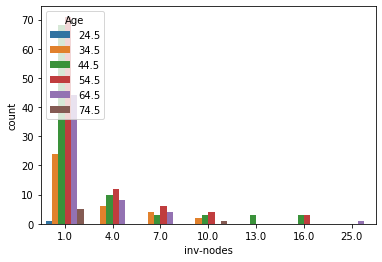

In [9]:
sns.countplot(x = 'inv-nodes' , hue= 'Age' , data = df )

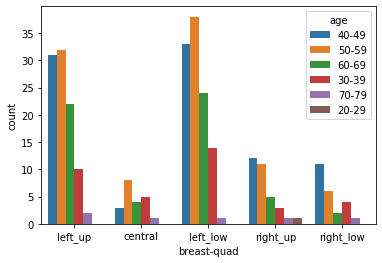

In [10]:
sns.countplot(x = 'breast-quad' , hue= 'age' , data = data)
# here we can see central , right_up , right_low are very much smaller compared to left_up , left_low
# here location do not play a big role in predicting hence we can eliminate it

In [13]:
# Defining dependent and independent variables
x = df.iloc[: , :-1].values
y = df.iloc[:, -1].values
# Splitting data into train test and split
x_train , x_test , y_train , y_test  = train_test_split(x,y, test_size = 0.30 , random_state =0)

### Decision Tree Classifier

In [17]:
# create an object of  the classifier
dt_classifier = DecisionTreeClassifier( criterion= 'entropy' , random_state= 101)
# fit the data into model
dt_classifier.fit(x_train , y_train)
# Predict on test result
dt_predictions = dt_classifier.predict(x_test)
acc_dt = accuracy_score(y_test , dt_predictions)
prc_dt = precision_score(y_test ,dt_predictions)
# Updating result to the evaluation table
loc1 = Eval_table.shape[0]
Eval_table.loc[loc1] = ['Decision Tree Classification' , acc_dt,prc_dt]

### Random Forest Classifier

In [19]:
rf_classifier   = RandomForestClassifier(n_estimators= 300 , criterion='entropy' , random_state= 0)
rf_classifier.fit(x_train , y_train)
rf_predictions=rf_classifier.predict(x_test)
rf_acc = accuracy_score(y_test , rf_predictions)
rf_prc = precision_score(y_test , rf_predictions)
loc1 = Eval_table.shape[0]
Eval_table.loc[loc1] = ['Random Forest Classifier' , rf_acc,rf_prc]

### K-nearest neighbour

In [20]:
knn = KNeighborsClassifier(n_neighbors= 5 , p = 2 , metric='minkowski'  )
knn.fit(x_train , y_train)
knn_predictions = knn.predict(x_test)
acc_knn = accuracy_score(y_test,knn_predictions)
prc_knn =precision_score(y_test , knn_predictions)
loc1 = Eval_table.shape[0]
Eval_table.loc[loc1] = ['K-nearest neighbour' , acc_knn,prc_knn]

### Support Vector Machine

In [21]:
svm = SVC( kernel='linear' , random_state = 101)
svm.fit(x_train , y_train)
svm_predictions = svm.predict(x_test)
a_svm=accuracy_score(y_test,svm_predictions)
p_svm = precision_score(y_test , svm_predictions)
loc1 = Eval_table.shape[0]
Eval_table.loc[loc1] = ['SVM' , a_svm,p_svm]

### Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(x_train , y_train)
lr_predictions = lr.predict(x_test)
lr_a = accuracy_score(y_test,lr_predictions)
lr_p = precision_score(y_test , lr_predictions)
loc1 = Eval_table.shape[0]
Eval_table.loc[loc1] = ['Logistic Regression' , a_svm,p_svm]

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Navie Bayes Classifier

In [24]:
nb= GaussianNB()
nb.fit(x_train , y_train)
nb_classifier = nb.predict(x_test)
nb_a = accuracy_score(y_test  , nb_classifier)
nb_p = precision_score(y_test , nb_classifier)
loc1 = Eval_table.shape[0]
Eval_table.loc[loc1] = ['Navie Bayes' , nb_a,nb_p]

### Ensembled LR

In [25]:
bag= BaggingClassifier(LogisticRegression(), max_samples= 0.5, max_features = 1.0, n_estimators = 5)
bag.fit(x_train,y_train)
bag_pred = bag.predict(x_test)
ea = accuracy_score(y_test , bag_pred)
ep = precision_score(y_test,bag_pred)
loc1 = Eval_table.shape[0]
Eval_table.loc[loc1] = ['E-LR' , ea,ep]

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [26]:
Eval_table

,Model,Accuracy,Precision
0,Decision Tree Classification,0.686047,0.608696
1,Random Forest Classifier,0.674419,0.590909
2,K-nearest neighbour,0.639535,0.571429
3,SVM,0.651163,0.750000
4,Logistic Regression,0.651163,0.750000
5,Navie Bayes,0.720930,0.750000
6,E-LR,0.709302,0.733333
